# Benchmarking Dimensionality Reduction Algorithms on Human Genome!

## Importing Libraries

In [6]:
from script.preprocessing import load_data, make_plot_ready
from script.pca import perform_PCA
from script.umap import perform_UMAP
from script.tsne import perform_TSNE
from script.MDS import perform_MDS
from script.isomap import perform_Isomap
from script.autoencoder import perform_autoEncoder
from script.plotting import PlotClusters
from matplotlib import pyplot as plt
from script.evaluate import compute_score
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [7]:
# Accept preprocessed chromosomes only!
while True:
    chromNo = int(input("Enter a chromosone number from 1, 16, 17, 21"))
    if chromNo not in [1, 16, 17, 21]:
        continue
    break

print("Running on Chromosome Number:", chromNo)

Running on Chromosome Number: 16


In [8]:
data, genotypes = load_data("1kg_chr"+str(chromNo)+"_pca_recode.raw")

In [9]:
data.head()

,FID,IID,PAT,MAT,SEX,PHENOTYPE,rs8056400_T,rs8466_G,rs216590_G,rs2541593_C,...,rs3809643_G,rs7206111_T,rs9935461_T,rs9927964_C,rs3826200_T,rs11642823_C,rs11641713_A,rs12925933_C,rs12446019_G,rs4785775_A
0,HG00096,HG00096,0,0,0,-9,0,0,1,1,...,0,0,0,0,0,0,0,2,0,0
1,HG00097,HG00097,0,0,0,-9,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,HG00099,HG00099,0,0,0,-9,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,HG00100,HG00100,0,0,0,-9,0,0,1,1,...,1,0,0,0,1,0,0,1,1,1
4,HG00101,HG00101,0,0,0,-9,0,0,0,0,...,1,0,0,0,1,0,0,1,1,1


#### Evaluations

For quantitative evaluations, we refer to work by [1] to measure the cluster homogeneity.

To evaluate the proportion of homogeneous clusters, we applied k-means clustering to the two top PCs. Cluster homogeneity was calculated by using k-means clustering to PC1 and PC2 for K clusters, where k was the square root of the number of samples. Clusters were considered homogeneous if they harbored only samples from one population.

Applying k-means clustering to PCA results for evaluating cluster homogeneity is rational because:
1. PCA reduces the genetic data dimensions to principal components that encapsulate significant variance, reflecting population structures with simplicity.
2. K-means clustering organizes individuals into distinct groups based on PCA scores, maximizing within-cluster similarity and between-cluster variance, indicative of different genetic backgrounds.
3. The homogeneity measure of these clusters against known population labels quantifies the effectiveness of clustering, allowing inferences on the genetic distinctiveness of populations.

The mathematical formula for the k-means clustering objective function is:

$$ J = \sum_{i=1}^{n} \sum_{j=1}^{k} z_{ij} \| x_i - \mu_j \|^2 $$

Where:

- $n$ is the number of samples,
- $k$ is the number of clusters,
- $x_i$ is the $i^{th}$ data point (e.g., PCA score of an individual),
- $\mu_j$ is the centroid of the $j^{th}$ cluster,
- $z_{ij}$ is a binary indicator variable that is 1 if sample $i$ is assigned to cluster $j$ and 0 otherwise,
- $\| x_i - \mu_j \|$ is the Euclidean distance between $x_i$ and $\mu_j$.

This objective function, known as the inertia or within-cluster sum of squares, is minimized by k-means during the clustering process.


[1]: Elhaik, Eran. "Principal Component Analyses (PCA)-based findings in population genetic studies are highly biased and must be reevaluated." Scientific reports 12.1 (2022): 14683.



## PCA

Homogeneity Score: 0.4


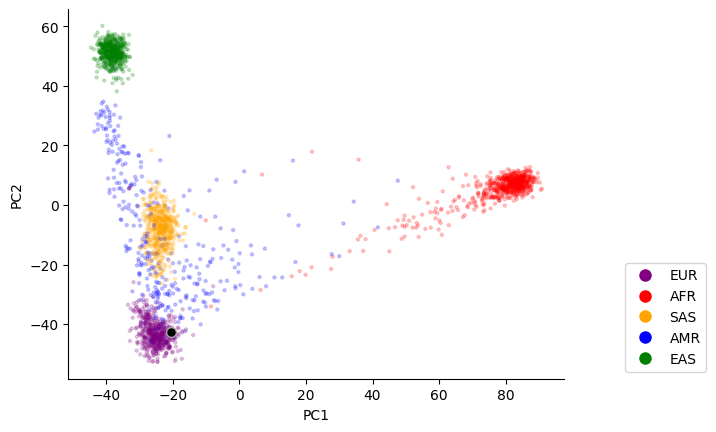

In [10]:
prefix = "PC"
n_components = 10
pcs = perform_PCA(genotypes, n_components)
pca_df = make_plot_ready(data, pcs, n_components, prefix)
print('Homogeneity Score:', compute_score(pca_df,prefix,pcx=1, pcy=2))
PlotClusters(pca_df, 1, 2, prefix, "superpop", ["mgymrek"])

Homogeneity Score: 0.42
Homogeneity Score: 0.6
Homogeneity Score: 0.56
Homogeneity Score: 0.26
Homogeneity Score: 0.22
Homogeneity Score: 0.2


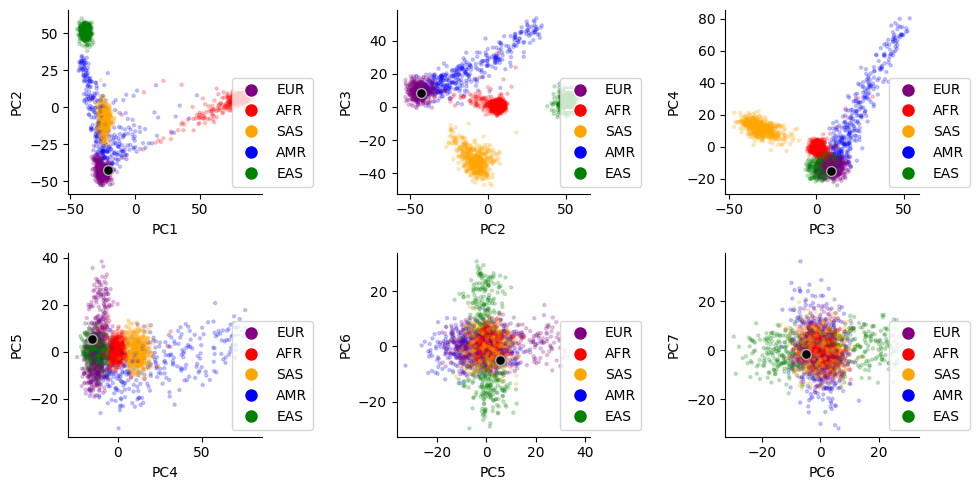

In [11]:
fignum = 1
prefix = 'PC'
fig = plt.figure()
fig.set_size_inches((10, 5))
for pc in range(1, 7):
    ax = fig.add_subplot(2, 3, fignum)
    use_legend=(pc==6)
    PlotClusters(pca_df, pc, pc+1, prefix, "superpop", ["mgymrek"],ax=ax)
    print('Homogeneity Score:', compute_score(pca_df,prefix,pcx=pc, pcy=pc+1))
    fignum += 1
fig.tight_layout()

### Analysis 

The PCA scatter plot illustrates a distribution of genetic samples along the first two principal components (PC1 and PC2), which likely capture the largest variances in the dataset. Different colors represent distinct ancestral populations: European (EUR), African (AFR), South Asian (SAS), Ad Mixed American (AMR), and East Asian (EAS). The clusters suggest that PCA can discern genetic variation among these populations, with clear separation between most groups. However, there is some overlap between the clusters, particularly with the Ad Mixed American (AMR) population, which indicates admixture or shared genetic variation with other groups. The homogeneity score of 0.42 suggests moderate effectiveness of PCA in clustering samples according to their ancestral origins within this two-dimensional projection.

## UMAP

Homogeneity Score: 0.7


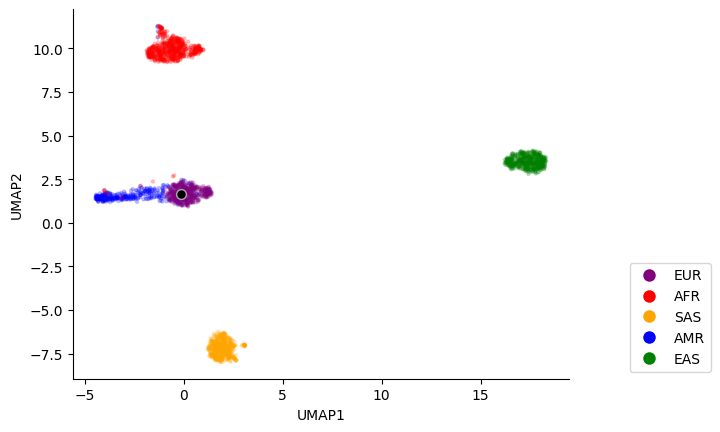

In [13]:
prefix = "UMAP"
n_components = 2
pcs = perform_UMAP(genotypes)
umap_df = make_plot_ready(data, pcs.T, n_components, prefix)
print('Homogeneity Score:', compute_score(umap_df,prefix,pcx=1, pcy=2))
PlotClusters(umap_df, 1, 2, prefix, "superpop", ["mgymrek"])

### Analysis

The UMAP scatter plot reveals a more distinct separation among the five ancestral populations compared to PCA, as indicated by the higher homogeneity score of 0.72. The ancestral populations—European (EUR), African (AFR), South Asian (SAS), Ad Mixed American (AMR), and East Asian (EAS)—are represented by different colors and are distributed across the UMAP1 and UMAP2 axes. Notably, the East Asian (EAS) population is clearly isolated from the others, showing a strong distinction in genetic variation. The South Asian (SAS) and Ad Mixed American (AMR) populations show some degree of overlap but are still mostly discernible. Overall, UMAP appears to be highly effective in capturing and visualizing the complex genetic structure and diversity of these populations within a reduced dimensional space.

## TSNE

Homogeneity Score: 0.76


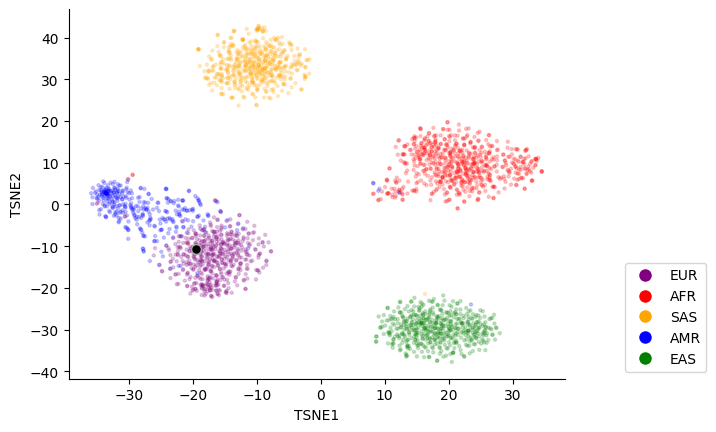

In [14]:
prefix = "TSNE"
n_components = 2
pcs = perform_TSNE(genotypes, n_components)
tsne_df = make_plot_ready(data, pcs.T, n_components, prefix)
print('Homogeneity Score:', compute_score(tsne_df,prefix,pcx=1, pcy=2))
PlotClusters(tsne_df, 1, 2, prefix, "superpop", ["mgymrek"])

### Analysis

Perplexity: Perplexity is a measure of how to balance attention between local and global aspects of data.
Number of Components (n_components): This parameter specifies the dimensionality of the space into which we're embedding the data. 
Learning Rate: The learning rate controls how much the t-SNE algorithm updates the solution in each iteration during optimization.

The t-SNE scatter plot shows the distribution of genetic samples when reduced to two dimensions aimed at maintaining the local structure of the high-dimensional data.
From the plot, we can observe the following:
1. Each ancestral population forms a distinct cluster, with minimal overlap between them. This indicates that t-SNE is effective at separating the high-dimensional genetic data into visible groupings that correspond well with known ancestral labels.
2.  There are a few points that do not cluster tightly with their primary population group. These could represent individuals with genetic profiles that do not follow the typical patterns of their population, possibly due to genetic admixture, measurement error, or variations within the population.
3. The homogeneity score reported as 0.7 suggests a reasonably high level of clustering purity. The clusters formed by t-SNE predominantly consist of individuals from a single ancestral background.

## MDS

Homogeneity Score: 0.3


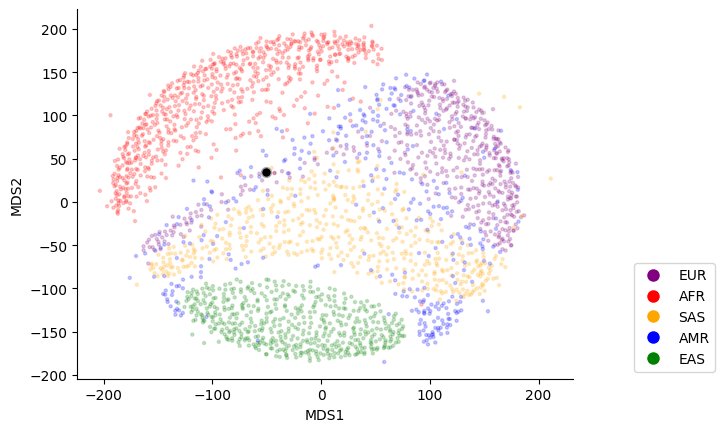

In [15]:
prefix = "MDS"
n_components = 2
pcs = perform_MDS(genotypes, n_components)
mds_df = make_plot_ready(data, pcs.T, n_components, prefix)
print('Homogeneity Score:', compute_score(mds_df,prefix,pcx=1, pcy=2))
PlotClusters(mds_df, 1, 2, prefix, "superpop", ["mgymrek"])

### Analysis

Multidimensional Scaling (MDS) is a means of visualizing the level of similarity of individual cases of a dataset. It is a technique that translates information about the pairwise 'distances' among a set of n objects or individuals into a configuration of n points mapped into an abstract Cartesian space.
With a homogeneity score of 0.28, the MDS plot indicates a lower degree of clustering purity. The MDS plot, while maintaining pairwise distances, does not appear to be as effective as PCA or t-SNE in achieving clear separation between different ancestral groups. This could be due to MDS preserving global distances at the expense of local structure or the particular nature of genetic variation, which might be better captured by algorithms like t-SNE that focus on local neighborhood preservation.

## Isomap

Homogeneity Score: 0.52


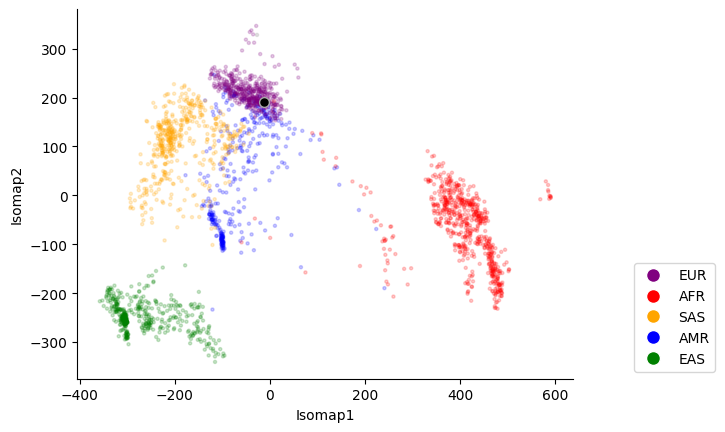

In [16]:
prefix = "Isomap"
n_components = 2
pcs = perform_Isomap(genotypes, n_components)
isomap_df = make_plot_ready(data, pcs.T, n_components, prefix)
print('Homogeneity Score:', compute_score(isomap_df,prefix,pcx=1, pcy=2))
PlotClusters(isomap_df, 1, 2, prefix, "superpop", ["mgymrek"])

### Analysis

The Isomap visualization shows the genetic data spread across two dimensions, Isomap1 and Isomap2, with a homogeneity score of 0.5. This suggests a moderate ability to distinguish between different ancestral populations. Each population—European (EUR), African (AFR), South Asian (SAS), Ad Mixed American (AMR), and East Asian (EAS)—is represented by clusters in distinct regions of the plot. The African (AFR) population is tightly clustered and well-separated from others, highlighting a strong genetic distinctiveness. The European (EUR) population is somewhat dispersed, indicating genetic diversity within this group. The South Asian (SAS) and Ad Mixed American (AMR) populations show some overlap, which could suggest shared genetic variation or recent admixture. The East Asian (EAS) group is relatively isolated, though its proximity to the other clusters is closer than seen in UMAP or t-SNE, which may reflect Isomap's approach to capturing the intrinsic geometry of the data. Overall, Isomap separates ancestral populations with some distinction but exhibits less clear demarcation compared to UMAP or t-SNE.



## Autoencoders

Epoch 1/100
3/3 [==============================] - 3s 460ms/step - loss: 1.0001 - val_loss: 0.9377
Epoch 2/100
3/3 [==============================] - 1s 420ms/step - loss: 0.9978 - val_loss: 0.9336
Epoch 3/100
3/3 [==============================] - 1s 407ms/step - loss: 0.9826 - val_loss: 0.9286
Epoch 4/100
3/3 [==============================] - 2s 513ms/step - loss: 0.9661 - val_loss: 0.9242
Epoch 5/100
3/3 [==============================] - 3s 845ms/step - loss: 0.9576 - val_loss: 0.9181
Epoch 6/100
3/3 [==============================] - 2s 713ms/step - loss: 0.9500 - val_loss: 0.9117
Epoch 7/100
3/3 [==============================] - 2s 460ms/step - loss: 0.9433 - val_loss: 0.9073
Epoch 8/100
3/3 [==============================] - 1s 347ms/step - loss: 0.9391 - val_loss: 0.9061
Epoch 9/100
3/3 [==============================] - 1s 275ms/step - loss: 0.9365 - val_loss: 0.9043
Epoch 10/100
3/3 [==============================] - 1s 245ms/step - loss: 0.9343 - val_loss: 0.9045
Epoch 11/

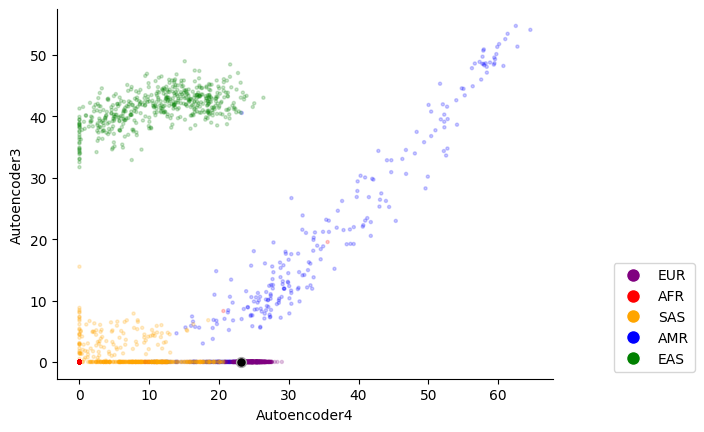

In [17]:
prefix = "Autoencoder"
n_components = 4
pcs = perform_autoEncoder(genotypes, n_components)
ae_df = make_plot_ready(data, pcs.T, n_components, prefix)
print('Homogeneity Score:', compute_score(ae_df,prefix,pcx=1, pcy=2))
PlotClusters(ae_df, 4, 3, prefix, "superpop", ["mgymrek"])

### Analysis
##### Structure:

**Encoder**: The encoder network reduces the input dimensions step by step to the number of n_components, which is the encoded or latent space representation of the data. The layer sizes and activations are chosen to progressively downsample the information.
**Decoder**: The decoder network then attempts to reconstruct the original data from this reduced representation by incrementally upsampling the n_components to the original input dimension.

**Trianing**: The autoencoder is trained using mean squared error (mse) as the loss function and adam as the optimizer. It tries to minimize the difference between the original input (genotypes) and the reconstructed output.
After the training is complete, the encoder is then used top map the higher dimensional data on the lower dimentional vector space


As apparent from the plot (We experimented with more dimentional pair plots), the model fails to effectively capture the cluster information due to spare nature of data (approx 25000 features to 2000 samples). With so many features and relatively few samples, the data can be very sparse, making it difficult for the model to learn effectively from the data without overfitting. Here the homogenity score doesnt effectively capture the model's inability to cluster data.

## Plotting

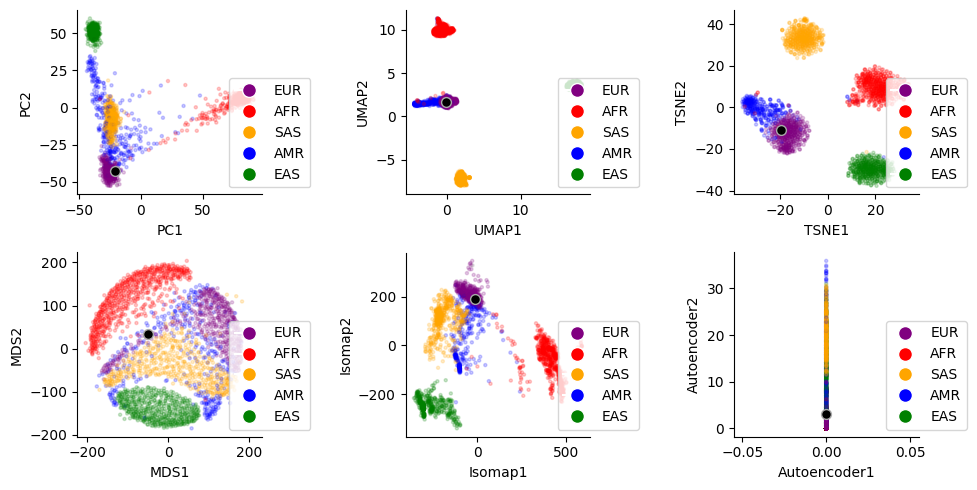

In [18]:
fignum = 1

iter_dict = {'PC':pca_df, 'UMAP':umap_df,'TSNE':tsne_df,'MDS':mds_df,'Isomap':isomap_df,'Autoencoder':ae_df}

fig = plt.figure()
fig.set_size_inches((10, 5))
for pre in iter_dict:
    ax = fig.add_subplot(2, 3, fignum)
    tmpi = iter_dict[pre]
    PlotClusters(tmpi, 1, 2, pre, "superpop", ["mgymrek"], ax=ax)
    fignum += 1
fig.tight_layout()